Breast Cancer Dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

線性分類

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# 輸入乳癌數據載入函數
from sklearn.datasets import load_breast_cancer

In [3]:
# 載入乳癌數據
data = load_breast_cancer()

In [4]:
# 檢查數據種類
type(data)

sklearn.utils.Bunch

In [5]:
# Bunch有如字典，可用key搜尋
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 'data' 指的是 (key, attribute)的 attribute
data.data.shape
# 569 樣本, 30 特徵

(569, 30)

In [8]:
# 目標值 0 (malignant)(有212個) 或 1 (benign)(357個)
data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
# 目標值的意義
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# 同樣569目標值
data.target.shape

(569,)

In [11]:
# 30 個特徵名稱
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# 
from sklearn.model_selection import train_test_split


# 數據分成 train set 和 test set

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape
print ("N:", N, "D:", D)

N: 381 D: 30


In [14]:
# 輸入數據調成標準值以免各特徵影響不同
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:

# 建立TF模型

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 另一種寫法
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

#編譯模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# 訓練模型
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# 評估模型 - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 3s 21ms/step - loss: 1.1920 - accuracy: 0.3386 - val_loss: 1.2657 - val_accuracy: 0.2606
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0945 - accuracy: 0.3753 - val_loss: 1.1588 - val_accuracy: 0.3138
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0059 - accuracy: 0.4199 - val_loss: 1.0609 - val_accuracy: 0.3617
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9240 - accuracy: 0.4646 - val_loss: 0.9739 - val_accuracy: 0.4043
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8512 - accuracy: 0.5013 - val_loss: 0.8960 - val_accuracy: 0.4415
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7871 - accuracy: 0.5538 - val_loss: 0.8265 - val_accuracy: 0.5000
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7295 - accuracy: 0.6089 - val_loss: 0.7654 - val_accuracy: 0.5745
Epoch 8/100


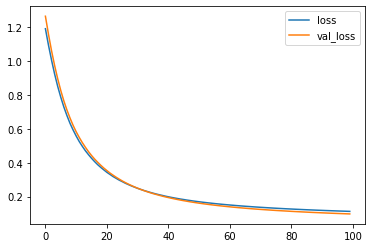

In [17]:
# 劃出 model.fit() training 和 validating 的 loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

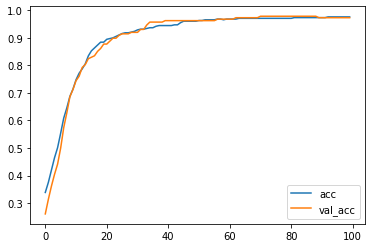

In [18]:
# 劃出準確性 accuracy 
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Part 2: 開始做預測



In [19]:
# 用 X_test 做預測
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[6.6303670e-02]
 [9.4600129e-01]
 [8.1956953e-01]
 [3.0620649e-02]
 [5.8891140e-03]
 [9.9735153e-01]
 [9.8576850e-01]
 [3.1109735e-02]
 [9.8323214e-01]
 [4.3397638e-01]
 [1.9288081e-03]
 [9.3752497e-01]
 [6.8094778e-01]
 [1.1045582e-04]
 [9.7817563e-02]
 [8.3626539e-01]
 [9.9774510e-01]
 [9.8707008e-01]
 [9.9680459e-01]
 [9.9394977e-01]
 [8.1590682e-01]
 [2.9428359e-02]
 [7.0700271e-06]
 [8.9542776e-01]
 [9.9085641e-01]
 [9.7906989e-01]
 [3.8559129e-03]
 [8.5990745e-01]
 [8.2173534e-02]
 [8.5775989e-01]
 [3.7215033e-03]
 [3.2926254e-02]
 [5.5718482e-02]
 [3.9405208e-03]
 [9.9227166e-01]
 [9.7659522e-01]
 [9.7354972e-01]
 [2.1632324e-04]
 [9.0846825e-01]
 [1.8192691e-03]
 [7.5216669e-01]
 [6.5739954e-01]
 [4.9847621e-03]
 [2.9977328e-01]
 [9.5339131e-01]
 [9.9039757e-01]
 [9.4494623e-01]
 [2.3734237e-01]
 [9.9303281e-01]
 [9.6035659e-01]
 [9.9396545e-01]
 [8.1630470e-04]
 [6.4015530e-02]
 [8.5154164e-01]
 [8.4341455e-01]
 [9.9887830e-01]
 [9.5906878e-01]
 [9.6363741e-01]
 [2.4251828e-0

In [20]:
# 四捨五入得到 0,1
# 將預測值從(N,1)壓扁成 (N,) 
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.]


In [21]:
# 將準確值和 evaluate() 比較
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 4ms/step - loss: 0.0980 - accuracy: 0.9734
Evaluate output: [0.09803155809640884, 0.9734042286872864]


# Part 3: 存放並載入模型


In [22]:
# 將模型存入檔案
model.save('linearclassifier.h5')

In [23]:
# 確認存在
!ls -lh 

total 24K
-rw-r--r-- 1 root root  19K Sep 30 13:43 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Sep 16 13:40 sample_data


In [24]:
# 載入模型測試 ( only work if you DON'T use the Input() layer explicitly before save)
# 
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.0980 - accuracy: 0.9734


[0.09803155809640884, 0.9734042286872864]

In [25]:

# 下載此檔
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>